## House price EDA

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

In [252]:
home_data = pd.read_csv('cleaned_data.csv')
home_data.shape

(1094, 86)

In [253]:
encoded_feat = ['Bsmt_magnitude', 'Remod_diff', 'MSSubClass_encoded', 'Neighborhood_encoded', 'MSZoning_encoded', 
                'HouseStyle_encoded', 'LotConfig_encoded', 'Condition1_encoded', 'BldgType_encoded', 
                'MoSold_encoded', 'YrSold_encoded', 'SaleType_encoded', 'SaleCondition_encoded']

hot_encoded = ['Attchd', 
                'Detchd', 'other_garage', 'RFn', 'Unf', 'Fin']

features = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','ExterQual','ExterCond','BsmtFinSF1','TotalBsmtSF','1stFlrSF','2ndFlrSF',
            'GrLivArea', 'FullBath','HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
            'GarageCars','GarageArea','GarageQual','GarageCond']


cont_feat = features + encoded_feat + hot_encoded

# possible_hot_code = ['LotShape','LandContour','RoofStyle','PavedDrive']

In [254]:
home_data.columns

Index(['Id', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'log_price', 'Bsmt_magnitude', 'Remod_diff',
       'MSSubClass_encoded', 'Ne

In [255]:
with open('house-prices-data/data_description.txt') as file:
    print(file.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [256]:
len(cont_feat)

41

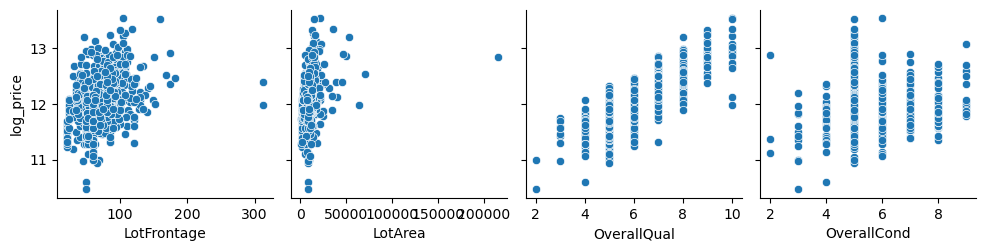

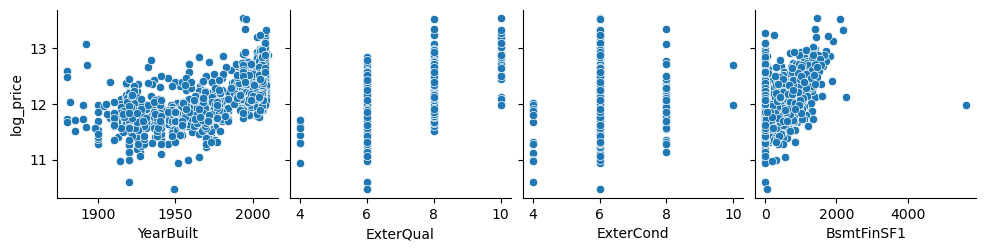

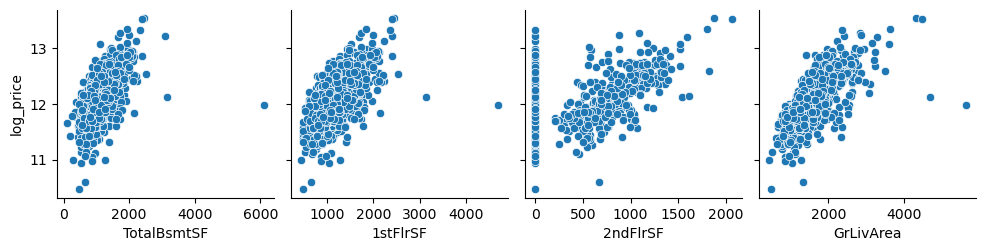

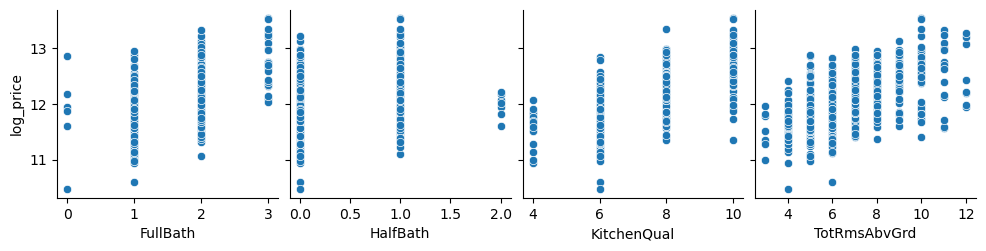

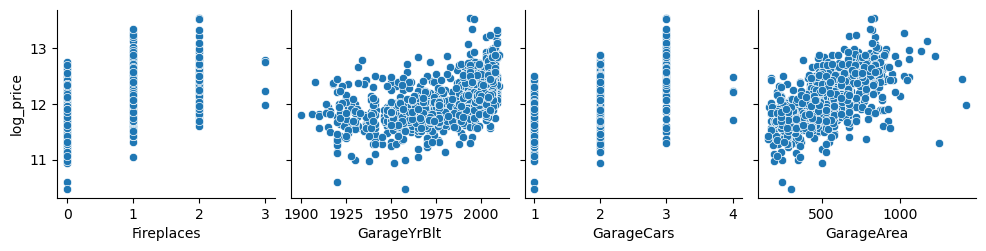

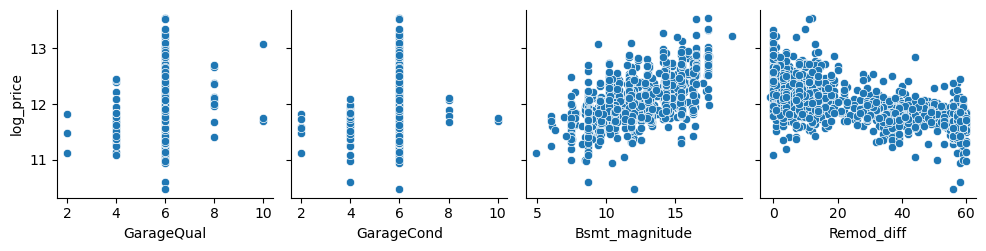

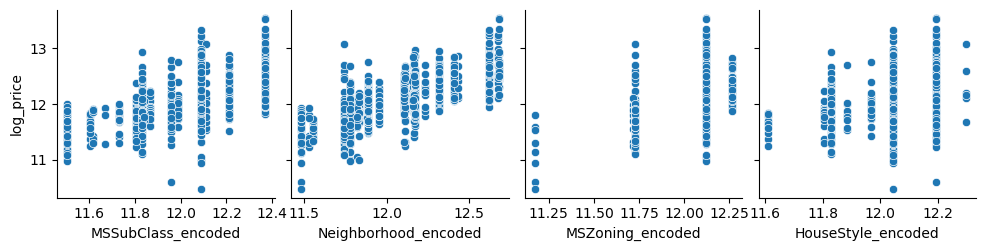

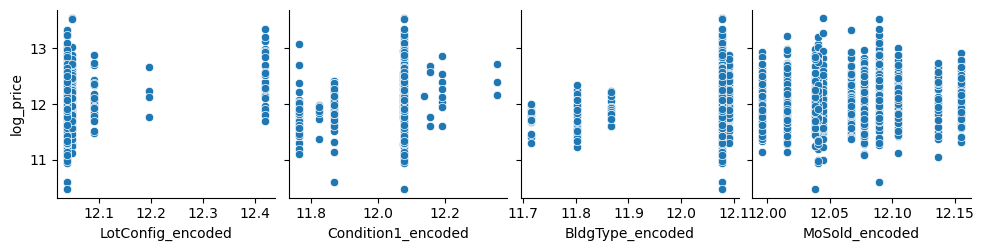

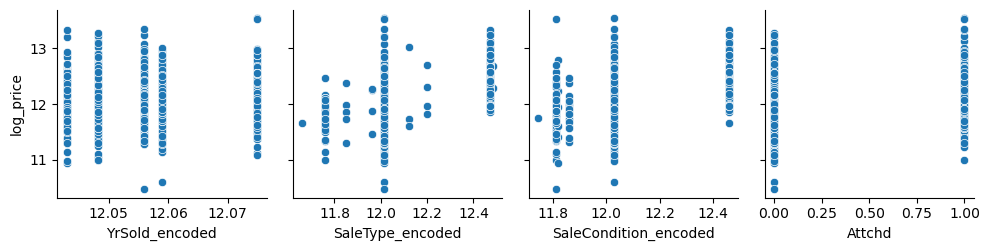

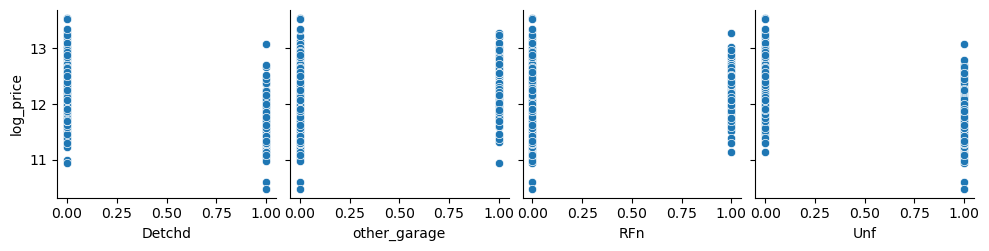

In [257]:
for i in range(10):
    
    sns.pairplot(home_data,
            x_vars = cont_feat[4*i:4*i + 4],
            y_vars = 'log_price')
    plt.show()


In [258]:

home_data[cont_feat + ['log_price']].corr()['log_price'].sort_values(ascending = False)

log_price                1.000000
OverallQual              0.823472
Neighborhood_encoded     0.763464
ExterQual                0.704831
GrLivArea                0.698453
KitchenQual              0.683726
GarageCars               0.672800
GarageArea               0.629614
FullBath                 0.625437
1stFlrSF                 0.616726
TotalBsmtSF              0.609388
YearBuilt                0.593347
Bsmt_magnitude           0.584488
MSSubClass_encoded       0.568322
GarageYrBlt              0.561098
TotRmsAbvGrd             0.559976
Fireplaces               0.477823
Fin                      0.433369
MSZoning_encoded         0.432478
SaleCondition_encoded    0.386374
SaleType_encoded         0.384807
Attchd                   0.370158
BsmtFinSF1               0.356022
LotFrontage              0.354647
HouseStyle_encoded       0.318195
2ndFlrSF                 0.293831
LotArea                  0.285449
HalfBath                 0.284557
RFn                      0.207858
Condition1_enc

In [259]:
# drop ExterCond, YrSold_encoded, OverallCond, MoSold_encoded


drop = ['ExterCond', 'YrSold_encoded', 'OverallCond', 'MoSold_encoded']

for i in drop:
    cont_feat.remove(i)

cont_feat

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'ExterQual',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'Bsmt_magnitude',
 'Remod_diff',
 'MSSubClass_encoded',
 'Neighborhood_encoded',
 'MSZoning_encoded',
 'HouseStyle_encoded',
 'LotConfig_encoded',
 'Condition1_encoded',
 'BldgType_encoded',
 'SaleType_encoded',
 'SaleCondition_encoded',
 'Attchd',
 'Detchd',
 'other_garage',
 'RFn',
 'Unf',
 'Fin']

In [260]:
# sns.pairplot(home_data[cont_feat])

# plt.show()

In [261]:
for feature in features:
    print(home_data[cont_feat].corr()[feature].sort_values(ascending = False))
    print('')
    print('---')
    print('')

LotFrontage              1.000000
1stFlrSF                 0.453035
LotArea                  0.419714
TotalBsmtSF              0.407566
GrLivArea                0.397260
GarageArea               0.357030
TotRmsAbvGrd             0.354714
MSSubClass_encoded       0.299567
GarageCars               0.285748
MSZoning_encoded         0.270269
Fireplaces               0.260293
OverallQual              0.241169
BsmtFinSF1               0.239734
Neighborhood_encoded     0.224313
Attchd                   0.219684
BldgType_encoded         0.194358
FullBath                 0.189692
KitchenQual              0.176808
Bsmt_magnitude           0.172572
ExterQual                0.166912
Fin                      0.137744
RFn                      0.132422
SaleType_encoded         0.119019
SaleCondition_encoded    0.115528
YearBuilt                0.107958
other_garage             0.098463
HouseStyle_encoded       0.094356
2ndFlrSF                 0.074953
GarageYrBlt              0.067254
GarageQual    

KeyError: 'OverallCond'

In [262]:
drop = ['GarageCars','GarageYrBlt','1stFlrSF','TotRmsAbvGrd']

for i in drop:
    cont_feat.remove(i)

In [264]:
print('Our features our ' + str(cont_feat))

Our features our ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'ExterQual', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'KitchenQual', 'Fireplaces', 'GarageArea', 'GarageQual', 'GarageCond', 'Bsmt_magnitude', 'Remod_diff', 'MSSubClass_encoded', 'Neighborhood_encoded', 'MSZoning_encoded', 'HouseStyle_encoded', 'LotConfig_encoded', 'Condition1_encoded', 'BldgType_encoded', 'SaleType_encoded', 'SaleCondition_encoded', 'Attchd', 'Detchd', 'other_garage', 'RFn', 'Unf', 'Fin']
